# Introductions

FINAL PROJECT

Nama        : Chairul Rifky Andika, Muhammad Septian Zamzani, Gerwyn Zulqarnain, San Gabriel Vanness Kenrick Erwi, Surya Karunia Ramadhan

Batch       : HCK-021

Objective   : Help companies adjust marketing strategies to increase sales based on sentiment analysis of product that have been sold.

# Background

We are data scientist from a mobile phone company, we were tasked with conducting sentiment analysis on reviews left by customers who shopped online. This is motivated by a decline in the smartphone market in Indonesia of 6% in the second semester (July-December) 2023 and 10% in the first semester (January-June) 2023. This analysis aims to help companies increase sales amidst the challenges of a declining market. Product reviews are an important indicator because potential buyers often use them as a reference for experiences from other customers. Reviews cover various aspects, such as product quality, function, durability, service, and delivery duration. Additionally, reviews also reflect customer satisfaction levels, which can be used to evaluate whether the product meets their needs and expectations. Through this sentiment analysis, companies hope to identify customer feedback patterns to design more effective sales increase strategies. This step is an important basis for improving customer experience and strengthening product competitiveness in a competitive market.

# SMART Framework

S : Increase Sales

M : Increase sales by 10%

A : Focus budget on targeted marketing to reduce marketing cost

R : Create different marketing strategy by understanding customer behavior

T : Project due in 1 year

# Problem Statement

Increase sales by 10% in one year by creating different marketing strategy based on customer behavior and reduce marketing cost .

# Problem Breakdown

How are the distribution of the brand?

What brand are most sold?

What are the average price of most sold product?

How are the sales of the most expensive products?

How are the sales of the most cheap products?

What are the most word mention in negative comments?

# Libraries

In [4]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from wordcloud import WordCloud

import re
import nltk
import string

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/Rifky/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Rifky/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Data Loading

In [22]:
# Read CSV wihtout header
df = pd.read_csv('analyst.csv', skiprows=1)

# Rename columns manually
df.columns = ['id', 'name', 'price', 'rating', 'sold', 'ram', 'rom', 'brand', 'warranty', 'signal']
df

,id,name,price,rating,sold,ram,rom,brand,warranty,signal
0,1,Asus Zenfone 10 8/128GB - Starry Blue,8999000,4.8,60,8,128,asus,official,on
1,2,Asus Zenfone 10 8/128GB - Aurora Green,8999000,4.9,60,8,128,asus,official,on
2,3,Asus Zenfone 10 8/128GB - Eclipse Red,8999000,5.0,70,8,128,asus,official,on
3,4,Asus Zenfone 10 8/128GB - Comet White,8999000,4.8,50,8,128,asus,official,on
4,5,Asus Zenfone 10 8/128GB - Midnight Black,8999000,4.9,100,8,128,asus,official,on
...,...,...,...,...,...,...,...,...,...,...
404,17,Official Xiaomi Redmi 12 (8GB/128GB) | (8GB/25...,1799000,4.9,8000,8,128,xiaomi,NaN,NaN
405,18,Official Xiaomi POCO X5 Pro 5G (6GB/128GB) | (...,3999000,4.9,6000,6,128,xiaomi,NaN,NaN
406,19,Xiaomi Official Redmi Note 12 50MP Triple Kame...,2299000,4.9,6000,6,128,xiaomi,NaN,NaN
407,20,XIAOMI OFFICIAL Redmi Note 12 Pro 5G Kamera 50...,4599000,4.9,5000,6,128,xiaomi,NaN,NaN


# Data Cleaning

In [58]:
# Check data duplicate
df.duplicated().sum()

0

In [64]:
# Drop row with nan value
df = df.dropna()

In [65]:
df

,id,name,price,rating,sold,ram,rom,brand,warranty,signal
0,1,Asus Zenfone 10 8/128GB - Starry Blue,8999000,4.8,60,8,128,asus,official,on
1,2,Asus Zenfone 10 8/128GB - Aurora Green,8999000,4.9,60,8,128,asus,official,on
2,3,Asus Zenfone 10 8/128GB - Eclipse Red,8999000,5.0,70,8,128,asus,official,on
3,4,Asus Zenfone 10 8/128GB - Comet White,8999000,4.8,50,8,128,asus,official,on
4,5,Asus Zenfone 10 8/128GB - Midnight Black,8999000,4.9,100,8,128,asus,official,on
...,...,...,...,...,...,...,...,...,...,...
189,16,Official Xiaomi Redmi 13C | Tiga kamera AI 50 ...,1799000,4.9,9000,6,128,xiaomi,official,on
190,17,Official Xiaomi Redmi 12 (8GB/128GB) | (8GB/25...,1799000,4.9,8000,8,128,xiaomi,official,on
191,18,Official Xiaomi POCO X5 Pro 5G (6GB/128GB) | (...,3999000,4.9,6000,6,128,xiaomi,official,on
192,19,Xiaomi Official Redmi Note 12 50MP Triple Kame...,2299000,4.9,6000,6,128,xiaomi,official,on


In [75]:
# Check value
print(df['price'].unique())

['8999000' '11999000' '9999000' '7999000' '6999000' '3949000' '3099000'
 '3799000' '3499000' '2999000' '2599000' '3199000' '2199000' '4299000'
 '3999000' '4049000' '1799000' '4899000' '2699000' '2099000' '14999000'
 '8499000' '5999000' '1999000' '2499000' '5199000' '2399000' '7499000'
 '4999000' '2299000' '1749000' '10999000' '15999000' '4199000' '299000'
 '1499000' '4499000' '4290000' '7190000' '3699000' '99990000' '2899000'
 '99000000' '100000000' '9899000' '3399000' '1699000' '3666000' '4888000'
 '9599000' '5699000' '1599000' '5899000' '1249000' '3599000' '33498000'
 '5509500' '6269500' '18619500' '3847000' '1994500' '1399000' '4099000'
 '27999000' '18999000' '15650000' '5399000' '2980000' '13999000'
 '29999000' '26999000' '24999000' '17999000' '6399000' '21999000'
 '1199000' '2799000' '4599000']


In [77]:
# ganti data tipe ke numeric
df['price'] = df['price'].astype(float)
df['rating'] = df['rating'].astype(float)
df['sold'] = df['sold'].astype(int)
df['ram'] = df['ram'].astype(int)
df['rom'] = df['rom'].astype(float)
df.head()

/var/folders/6n/l80zp15d3wqdng5bgjk0cxp40000gp/T/ipykernel_10253/805175763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].astype(float)
/var/folders/6n/l80zp15d3wqdng5bgjk0cxp40000gp/T/ipykernel_10253/805175763.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].astype(float)
/var/folders/6n/l80zp15d3wqdng5bgjk0cxp40000gp/T/ipykernel_10253/805175763.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

,id,name,price,rating,sold,ram,rom,brand,warranty,signal
0,1,Asus Zenfone 10 8/128GB - Starry Blue,8999000.0,4.8,60,8,128.0,asus,official,on
1,2,Asus Zenfone 10 8/128GB - Aurora Green,8999000.0,4.9,60,8,128.0,asus,official,on
2,3,Asus Zenfone 10 8/128GB - Eclipse Red,8999000.0,5.0,70,8,128.0,asus,official,on
3,4,Asus Zenfone 10 8/128GB - Comet White,8999000.0,4.8,50,8,128.0,asus,official,on
4,5,Asus Zenfone 10 8/128GB - Midnight Black,8999000.0,4.9,100,8,128.0,asus,official,on


In [78]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 193
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        194 non-null    object 
 1   name      194 non-null    object 
 2   price     194 non-null    float64
 3   rating    194 non-null    float64
 4   sold      194 non-null    int64  
 5   ram       194 non-null    int64  
 6   rom       194 non-null    float64
 7   brand     194 non-null    object 
 8   warranty  194 non-null    object 
 9   signal    194 non-null    object 
dtypes: float64(3), int64(2), object(5)
memory usage: 16.7+ KB


# Exploratory Data Analysis

### How are the distribution of the brand?

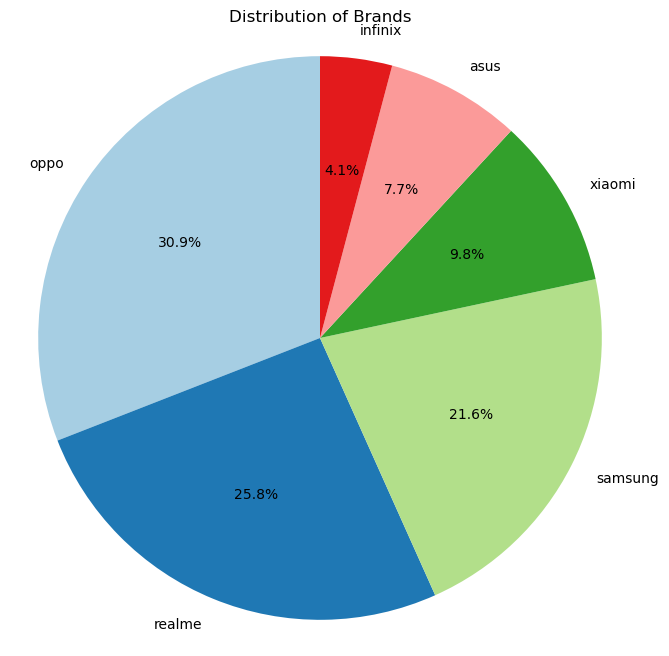

In [109]:
# Count the occurrences of each brand
brand_counts = df['brand'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Brands')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

This chart shows the variance of the brand available at the market

### What brand are most sold?

In [79]:
brand_sales = df.groupby('brand')['sold'].sum()

# Find the most sold brand
most_sold_brand = brand_sales.idxmax()  # Brand with the highest total sales
most_sold_quantity = brand_sales.max()  # Total quantity sold for that brand

# Display the result
print(f"The most sold brand is '{most_sold_brand}' with a total quantity of {most_sold_quantity} units.")

# Optional: Display all brand sales
print("\nTotal sales by brand:")
print(brand_sales)


The most sold brand is 'xiaomi' with a total quantity of 66100 units.

Total sales by brand:
brand
asus        1020
infinix    10750
oppo       29529
realme      6269
samsung    37785
xiaomi     66100
Name: sold, dtype: int64


The most sold brand is Xiaomi with a total quantity of 66100 units. This indicates Xiaomi offers devices with powerful processors, ample RAM, and generous ROM at a fraction of the cost of other premium brands. Xiaomi has earned a reputation for offering durable products with a good user experience, further incentivizing purchases.

### What are the average price of most sold product?

In [81]:
# Filter the rows for the Xiaomi brand
xiaomi_data = df[df['brand'].str.lower() == 'xiaomi']  # Case-insensitive filtering

# Calculate the average price of Xiaomi products
average_price = xiaomi_data['price'].mean()

# Display the result
print(f"The average price of Xiaomi products is: {average_price:,.2f}")

The average price of Xiaomi products is: 3,464,789.47


The average price of Xiaomi is Rp 3.464.789,47. This indicates Xiaomi consistently offers competitive pricing across its product range. Customers seeking high-quality smartphones and gadgets at a lower price point are drawn to Xiaomi.

### How are the sales of the most expensive products?

In [107]:
# Group by brand to calculate average price
avg_price_per_brand = df.groupby('brand')['price'].mean()

# Identify the most expensive and cheapest brands
most_expensive_brand = avg_price_per_brand.idxmax()

# Filter data for the most expensive brand
most_expensive_data = df[df['brand'] == most_expensive_brand]
total_sales_expensive = most_expensive_data['sold'].sum()
most_common_ram_expensive = most_expensive_data['ram'].max()
most_common_rom_expensive = most_expensive_data['rom'].max()

# Display the results
print(f"The most expensive brand is '{most_expensive_brand}'.")
print(f"Total sales for '{most_expensive_brand}' is {int(total_sales_expensive)} units.")
print(f"The most common RAM for '{most_expensive_brand}' is {most_common_ram_expensive} GB.")
print(f"The most common ROM for '{most_expensive_brand}' is {most_common_rom_expensive} GB.\n")


The most expensive brand is 'realme'.
Total sales for 'realme' is 6269 units.
The most common RAM for 'realme' is 12 GB.
The most common ROM for 'realme' is 512.0 GB.



The most expensive brand is Realme with total sales 6269 units. This indicates Realme targets budget-conscious consumers by offering high-performance smartphones at competitive prices. The spesifications shows that many Realme devices are equipped with gaming-focused processors (e.g., MediaTek Dimensity or Snapdragon series), appealing to young, tech-savvy consumers.

### How are the sales of the most cheap products?

In [104]:
# Group by brand to calculate average price
avg_price_per_brand = df.groupby('brand')['price'].mean()

# Identify the cheapest brand
cheapest_brand = avg_price_per_brand.idxmin()

# Filter data for the cheapest brand
cheapest_brand_data = df[df['brand'] == cheapest_brand]

# Calculate total sales for the cheapest brand
total_sales = cheapest_brand_data['sold'].sum()

# Extract RAM and ROM information
most_common_ram = cheapest_brand_data['ram'].mode()[0]  # Most common RAM
most_common_rom = cheapest_brand_data['rom'].mode()[0]  # Most common ROM

# Display the results
print(f"The cheapest brand is '{cheapest_brand}'.")
print(f"Total sales for '{cheapest_brand}' is {int(total_sales)} units.")
print(f"The most common RAM for '{cheapest_brand}' is {most_common_ram} GB.")
print(f"The most common ROM for '{cheapest_brand}' is {most_common_rom} GB.")

The cheapest brand is 'infinix'.
Total sales for 'infinix' is 10750 units.
The most common RAM for 'infinix' is 40 GB.
The most common ROM for 'infinix' is 256.0 GB.


The cheapest brand if infinix with total sales 10750 units. This indicates Infinix is one of the most affordable smartphone brands, making it attractive to cost-conscious customers. 

### What are the most word mention in negative comments?

In [6]:
df1 = pd.read_csv('product_reviews.csv')
df1

,Review,Rating
0,Beli Online memang paling aman di official store,bintang 5
1,"Barang masih di segel, tepat waktu, dan packin...",bintang 5
2,"mantab greget, penguriman aman,sampai tujuan s...",bintang 5
3,"pertama kali beli online, aman. packing rapi",bintang 5
4,"Barang bagus, berfungsi dengan baik, untuk pen...",bintang 4
...,...,...
8793,"Diterima sesuai dengan promo, jadwal, barang b...",bintang 5
8794,Mantap👍👍... datangnya lebih cepat dri waktu po...,bintang 5
8795,Mantap...beli tgl 9 feb dikirim tgl 15 feb \nl...,bintang 5
8796,Barangnya original 👍 Kemasan disegel Spesifika...,bintang 5


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8798 entries, 0 to 8797
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  8284 non-null   object
 1   Rating  8798 non-null   object
dtypes: object(2)
memory usage: 137.6+ KB


In [85]:
print(df1['Rating'].unique())

['bintang 5' 'bintang 4' 'bintang 3' 'bintang 2' 'bintang 1']


In [87]:
# Hapus simbol '+' dan tulisan 'terjual' lalu ganti tipe data ke integer
df1['Rating'] = df1['Rating'].str.replace('bintang ', '')
df1['Rating'] = df1['Rating'].astype(int)

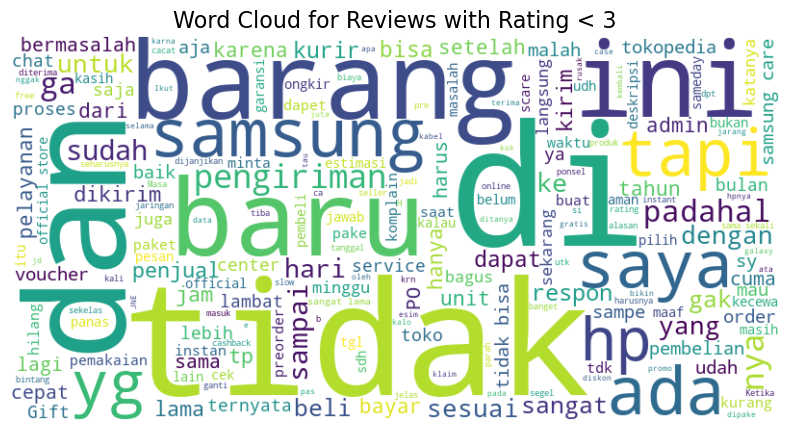

In [88]:
# Filter rows where rating < 3
low_rating_reviews = df1[df1['Rating'] < 3]

# Combine all review text into a single string
text_data = " ".join(low_rating_reviews['Review'].dropna().astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes for a cleaner look
plt.title("Word Cloud for Reviews with Rating < 3", fontsize=16)
plt.show()

There are so many bad words mentions in di review, handling negative reviews effectively is crucial for maintaining customer trust and improving your product or service.

# Conclusions

Xiaomi consistently offers competitive pricing across its product range. Customers seeking high-quality smartphones and gadgets at a lower price point are drawn to Xiaomi. Xiaomi offers devices with powerful processors, ample RAM, and generous ROM at a fraction of the cost of other premium brands and popular in regions like Southeast Asia, India, and China due to their affordability and reliability. Xiaomi has earned a reputation for offering durable products with a good user experience, further incentivizing purchases.

Realme invests in stylish, modern designs and vibrant color options to appeal to younger audiences. Many Realme products offer premium features like high-refresh-rate displays (90Hz/120Hz), large screens, and slim designs at mid-range prices. Realme consistently receives high user ratings for its price-to-performance ratio, battery life, and camera quality.

People buy Infinix devices primarily because they offer budget-friendly smartphones with decent features, catering to entry-level and mid-range markets. Infinix has carved a niche for itself in developing markets, where affordability and practicality are key.

